In [3]:
N = (3 + 4 ) % 5 + 1
print('Мій варіант: ', N)

Мій варіант:  3


## Task 1

In [7]:
import pandas as pd
names = pd.read_csv("NationalNames.csv")

print(names.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


## Task 2

In [13]:
print(names.tail(8))

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


## Task 4

In [18]:
print(names.describe())

                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


## Task 5

In [21]:
print(names['Name'].nunique())

93889


## Task 6

In [35]:
unique_names_count = names.groupby('Gender')['Name'].nunique()

print(unique_names_count.reset_index())

  Gender   Name
0      F  64911
1      M  39199


## Task 7

In [52]:
names_2010_male = names[(names['Year'] == 2010) & (names['Gender'] == 'M')]
print( names_2010_male.sort_values(by='Count', ascending=False).head(5))


              Id     Name  Year Gender  Count
1677392  1677393    Jacob  2010      M  22082
1677393  1677394    Ethan  2010      M  17985
1677394  1677395  Michael  2010      M  17308
1677395  1677396   Jayden  2010      M  17152
1677396  1677397  William  2010      M  17030


## Task 8

In [66]:
most_popular_name = names.sort_values(by='Count', ascending=False).head(1)
name = most_popular_name['Name'].iloc[0]
year = most_popular_name['Year'].iloc[0]

print(f"The name is '{name}' in {year}")

The name is 'Linda' in 1947


## Task 9

In [69]:
min_count = names['Count'].min()

min_count_records = len(names[names['Count'] == min_count])

print(min_count_records)

254615


## Task 10

In [76]:
unique_names_per_year = names.groupby('Year')['Name'].nunique()

print(unique_names_per_year.reset_index())

     Year   Name
0    1880   1889
1    1881   1830
2    1882   2012
3    1883   1962
4    1884   2158
..    ...    ...
130  2010  31603
131  2011  31418
132  2012  31236
133  2013  30774
134  2014  30579

[135 rows x 2 columns]


## Task 11

In [85]:
unique_names_per_year = names.groupby('Year')['Name'].nunique()

year_with_max_unique_names = unique_names_per_year.idxmax()
max_unique_names_count = unique_names_per_year.max()

result_df = pd.DataFrame({
    'Year': [year_with_max_unique_names],
    'Count': [max_unique_names_count]
})

print(result_df)

   Year  Count
0  2008  32488


## Task 12

In [98]:
unique_names_per_year = names.groupby('Year')['Name'].nunique()
year_with_max_unique_names = unique_names_per_year.idxmax()

most_popular_name = names[names['Year'] == year_with_max_unique_names].sort_values(by='Count', ascending=False).head(1)

print(most_popular_name['Name'].iloc[0])

Jacob


## Task 18

In [109]:
gender_count_per_year = names.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)

years_more_girls = gender_count_per_year[gender_count_per_year['F'] > gender_count_per_year['M']]

print(len(years_more_girls))


54


## Task 19

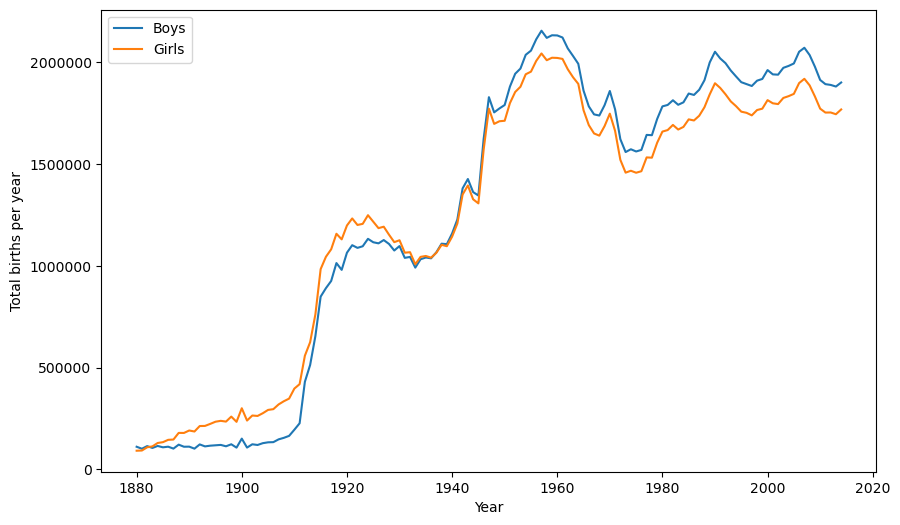

In [148]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

gender_count_per_year = names.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

plt.plot(gender_count_per_year.index, gender_count_per_year['M'], label='Boys')
plt.plot(gender_count_per_year.index, gender_count_per_year['F'], label='Girls')

formatter = FuncFormatter(lambda x, pos: '{:.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.ylabel('Total births per year')
plt.legend()

plt.show()

## Task 20

In [151]:
gender_names_count = names.groupby(['Name', 'Gender']).size().unstack(fill_value=0)
neutral_names = gender_names_count[(gender_names_count['M'] > 0) & (gender_names_count['F'] > 0)]
count_neutral_names = neutral_names.shape[0]
print(count_neutral_names)

10221


## Task 21

In [169]:
boys_named_barbara = names[(names['Name'] == 'Barbara') & (names['Gender'] == 'M')]

print(boys_named_barbara['Count'].sum())

4139


## Task 23

In [309]:
name_year_count = names.groupby(['Name', 'Year'])['Count'].sum().unstack(fill_value=0)
names_present_in_all_years = name_year_count.dropna(axis=0, how='any')
popular_neutral_names = names_present_in_all_years.sum(axis=1)
most_popular_neutral_names = popular_neutral_names.sort_values(ascending=False)
print(most_popular_neutral_names.reset_index(name = 'Count').head(15))

           Name    Count
0         James  5129096
1          John  5106590
2        Robert  4816785
3       Michael  4330805
4          Mary  4130441
5       William  4071368
6         David  3590557
7        Joseph  2580687
8       Richard  2564867
9       Charles  2376700
10       Thomas  2291517
11  Christopher  2004177
12       Daniel  1876880
13    Elizabeth  1606282
14     Patricia  1575529


## Task 25

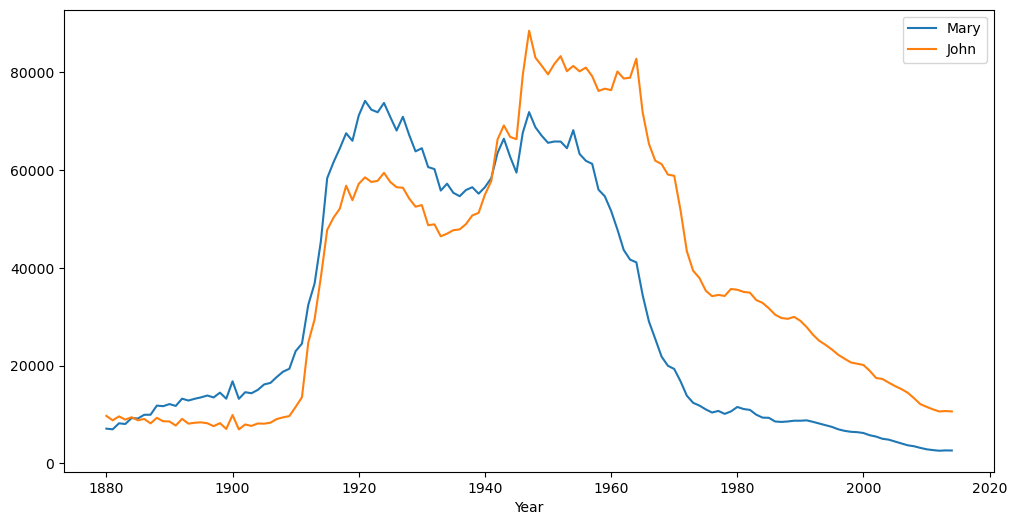

In [206]:
john_data = names[names['Name'] == 'John']
mary_data = names[names['Name'] == 'Mary']

john_years_count = john_data.groupby('Year')['Count'].sum()
mary_years_count = mary_data.groupby('Year')['Count'].sum()

plt.figure(figsize=(12, 6))
plt.plot(mary_years_count.index, mary_years_count.values, label = 'Mary')
plt.plot(john_years_count.index, john_years_count.values, label = 'John')
plt.xlabel('Year')
plt.legend()
plt.show()

## Task 27

In [302]:
result = names.groupby('Year').apply(
    lambda x: x.loc[x['Count'].idxmax(), ['Name', 'Count']]
, include_groups = False).reset_index()

print(result)


     Year      Name  Count
0    1880      John   9655
1    1881      John   8769
2    1882      John   9557
3    1883      John   8894
4    1884      John   9388
..    ...       ...    ...
130  2010  Isabella  22883
131  2011    Sophia  21816
132  2012    Sophia  22267
133  2013    Sophia  21147
134  2014      Emma  20799

[135 rows x 3 columns]
